In [1]:
import pandas as pd
import numpy as np

**Тема: Аналіз та прогнозування випадків туберкульозу в Індії за допомогою регресійних моделей**

# 1. Попередня обробка даних.

## 1.1 Завантажити та оглянути набір даних.

In [2]:
data = pd.read_excel('filled_final_data.xlsx')
data.shape

(148, 26)

In [3]:
data.head()

,City,Year,Active Case Finding TB cases diagnosed among tested,Active Case Finding TB Presumptive TB cases tested out of those screened,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,Paediatric TB patients notified,TB case notification total,TB Cases Notified Female,TB Cases Notified Male,TB patients with known Tobacco usage status,...,Treatment outcome of TB-HIV patients notified in (Death Rate),Treatment outcome of TB-HIV patients notified in (Success Rate),PMDT- Infrastructure No. of Nodal DR-TB centres,TB- DM patients initiated on Anti-diabetic treatment,Treatment outcome of Paediatric TB patients notified in (Death Rate),Treatment outcome of Paediatric TB patients notified in (Success Rate),Pregnant TB patients identified,TB - DM Patients diagnosed among tested,TB patients with known Alcohol usage status,TB-COVID 19 patients detected
0,Andaman & Nicobar Islands,2019,6,103,60,37,144,214,344,137,...,0,75,1,48,0,23,0,92,425,0
1,Andhra Pradesh,2019,1771,35785,1924,3641,176,29046,61977,47090,...,11,83,4,4735,26,3090,83,9045,69442,222
2,Arunachal Pradesh,2019,27,1535,173,462,216,1545,1871,602,...,0,75,5,48,5,314,0,47,2219,1
3,Assam,2019,547,7114,588,1664,126,14142,28732,8199,...,12,57,6,966,28,1271,29,2081,22463,55
4,Bihar,2019,2483,51380,4055,10691,87,37322,67489,6081,...,4,66,7,1446,171,8279,185,4742,58337,73


## 1.2 Перевірити наявність пропущених значень.

In [4]:
data.isnull().sum()

City                                                                        0
Year                                                                        0
Active Case Finding TB cases diagnosed among tested                         0
Active Case Finding TB Presumptive TB cases tested out of those screened    0
MDR/RR TB DIAGNOSED MDR/RR patient diagnosed                                0
Paediatric TB patients notified                                             0
TB case notification total                                                  0
TB Cases Notified Female                                                    0
TB Cases Notified Male                                                      0
TB patients with known Tobacco usage status                                 0
TB-HIV co-infected patients Diagnosed                                       0
TB-HIV co-infected patients Put on ART                                      0
Treatment outcome of TB patients notified in (% Lost to follow u

## 1.3 Видалити або заповнити пропущені значення. (не потрібно).

In [5]:
pass

## 1.4 Виключити нерелавантні змінні.

Деякі записи у датасеті мають неузгоджений формат даних. Наприклад у
* Treatment outcome of TB patients notified in (% Lost to follow up)
* Treatment outcome of TB patients notified in (Death Rate)
* Treatment outcome of TB patients notified in (Success Rate)
* Treatment outcome of TB patients notified in (Treatment Failure Rate)
* Treatment outcome of TB-HIV patients notified in (Death Rate)
* Treatment outcome of TB-HIV patients notified in (Success Rate)

дані за 2019 рік представлені у процентах, а після 2019 представлені їх абсолютні значення. Для виправлення цього я заміню усі абсолютні значення на процентні.

In [6]:
addition_data = pd.read_excel('addition.xlsx')
addition_data = addition_data.rename(columns={'Unnamed: 0': 'City'})

In [7]:
columns_to_update = ['Treatment outcome of TB patients notified in (Success Rate)',
                     'Treatment outcome of TB patients notified in (Death Rate)',
                     'Treatment outcome of TB patients notified in (Treatment Failure Rate)',
                     'Treatment outcome of TB patients notified in (% Lost to follow up)',
                     'Treatment outcome of TB-HIV patients notified in (Success Rate)',
                     'Treatment outcome of TB-HIV patients notified in (Death Rate)']

In [8]:
data = data.copy()
merged_df = pd.merge(left=data, right=addition_data, how='left', on='City')
data.loc[0:36, columns_to_update[0]] = merged_df.loc[0:36, columns_to_update[0] + '_y']
data.loc[0:36, columns_to_update[1]] = merged_df.loc[0:36, columns_to_update[1] + '_y']
data.loc[0:36, columns_to_update[2]] = merged_df.loc[0:36, columns_to_update[2] + '_y']
data.loc[0:36, columns_to_update[3]] = merged_df.loc[0:36, columns_to_update[3] + '_y']
data.loc[0:36, columns_to_update[4]] = merged_df.loc[0:36, columns_to_update[4] + '_y']
data.loc[0:36, columns_to_update[5]] = merged_df.loc[0:36, columns_to_update[5] + '_y']

In [9]:
original_data = data.copy()
data = data[data['City'] != 'INDIA']
data = data.drop(['City'], axis=1)

## 1.5 Виконати стандартизацію числових даних.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[data.columns] = scaler.fit_transform(scaled_data[data.columns])

# 2. Аналіз даних

## 2.1 Дослідити кореляції між змінними за допомогою теплової карти.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

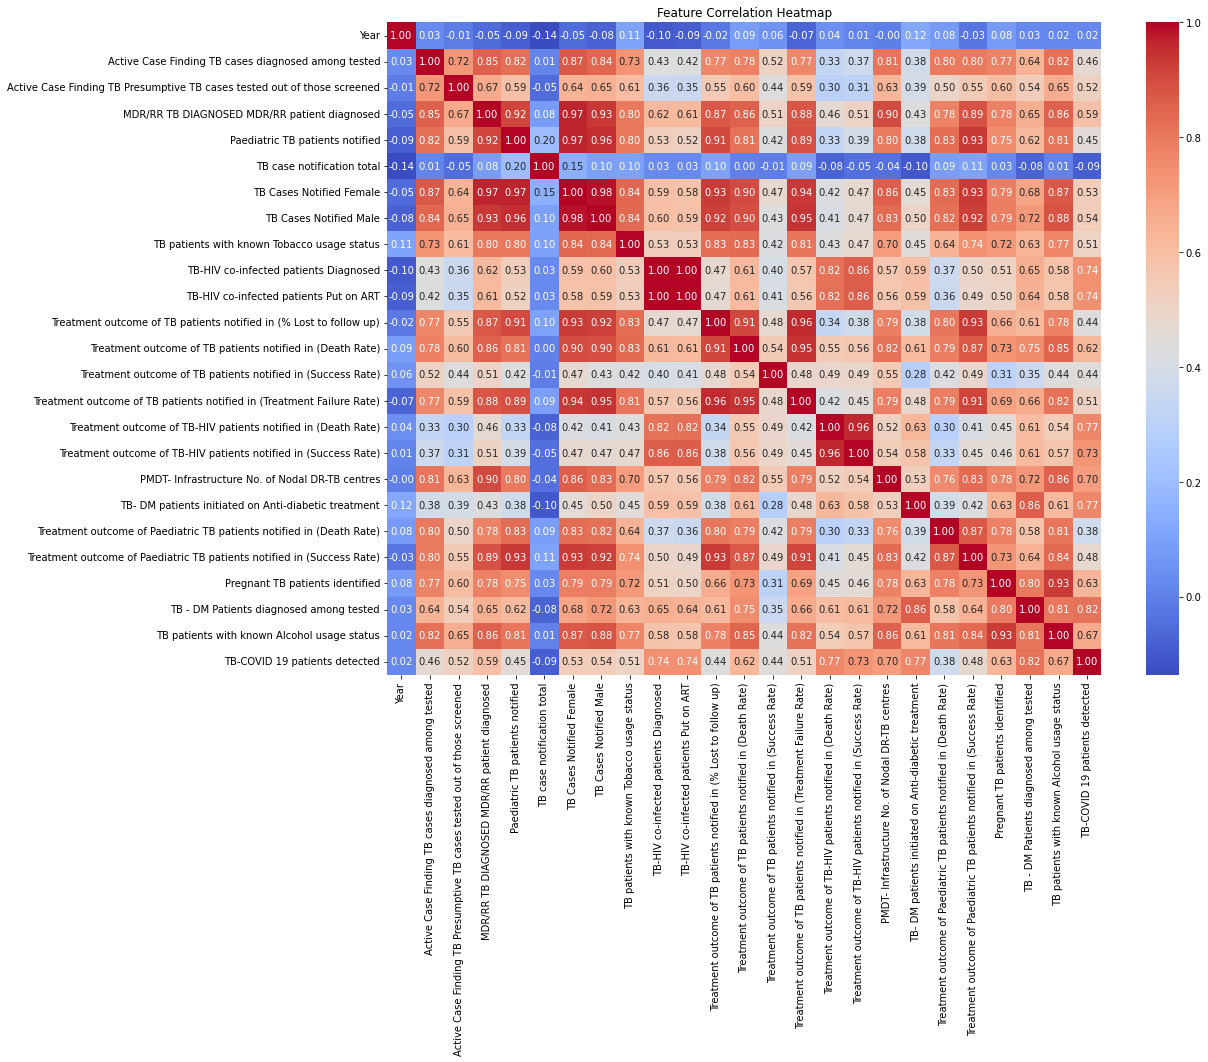

In [13]:
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# corr_matrix = data.corr().abs()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# threshold = 0.9
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# filtered = data.drop(columns=to_drop)

# scaler = StandardScaler()
# scaled_data = filtered.copy()
# scaled_data[filtered.columns] = scaler.fit_transform(scaled_data[filtered.columns])

## 2.2 Зобразити розподіл цільової змінної (“TB case notification total”).

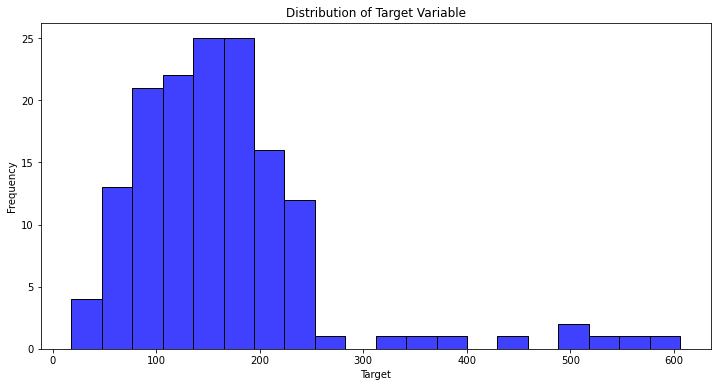

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(original_data['TB case notification total'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='City', y='TB case notification total', data=original_data)
# plt.title('Target Distribution by City')
# plt.xlabel('ID')
# plt.xticks(rotation=45)
# plt.ylabel('Target')
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.lineplot(x='Year', y='TB case notification total', hue='City', data=original_data, marker='o')
# plt.title('Target Variable Over Time')
# plt.xlabel('Time')
# plt.ylabel('Target')
# plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

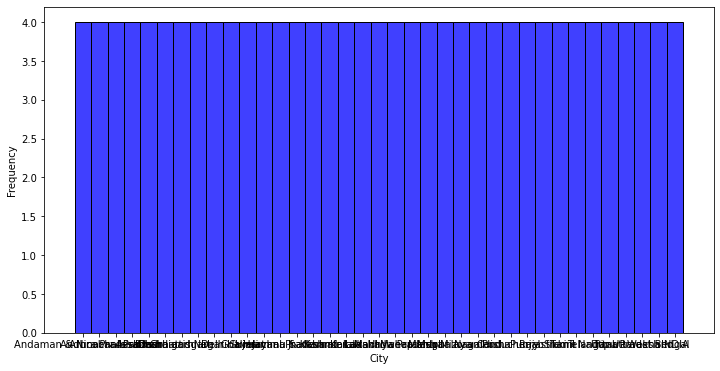

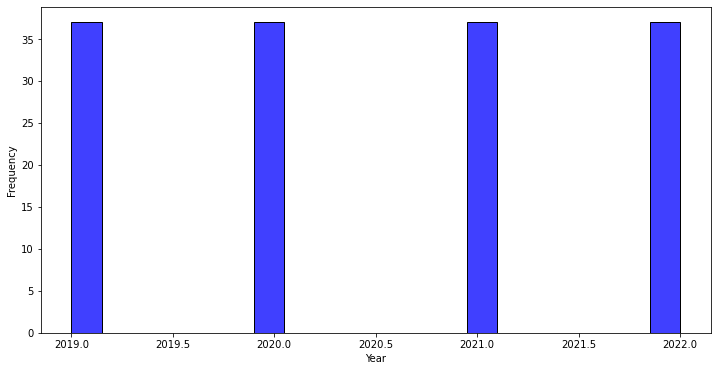

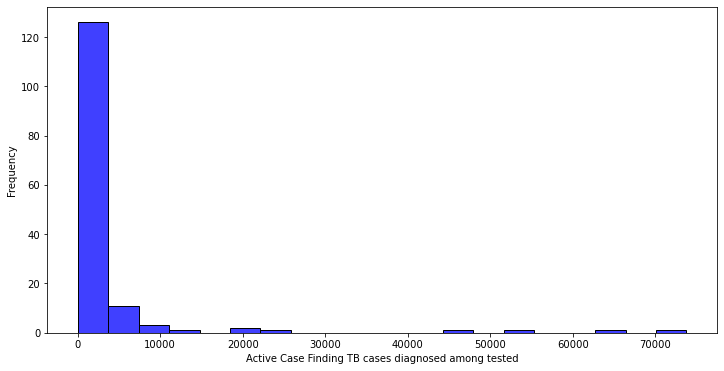

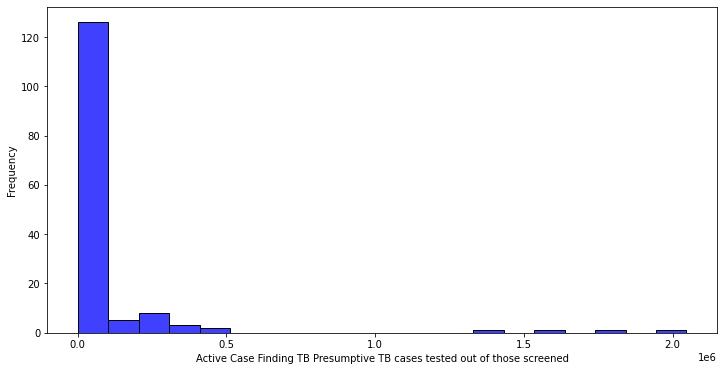

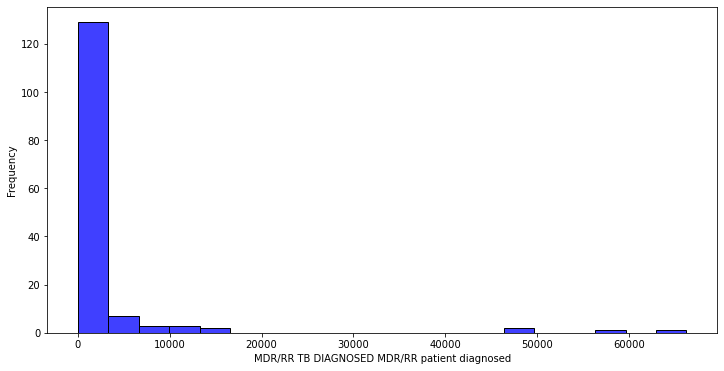

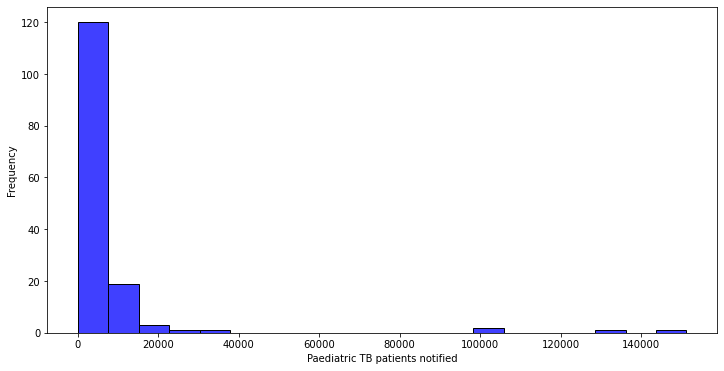

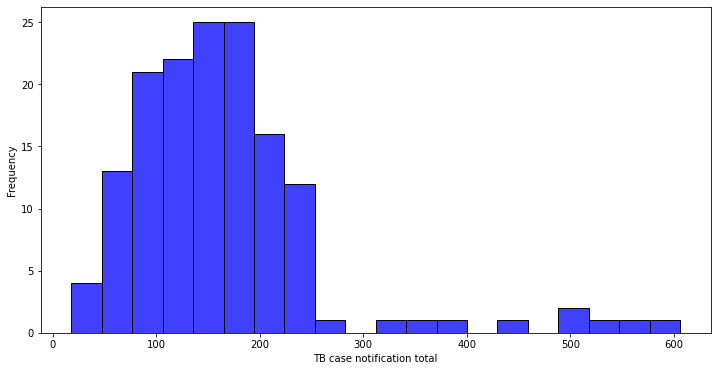

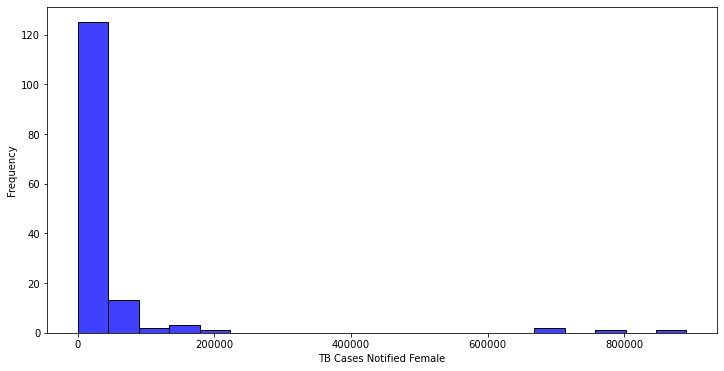

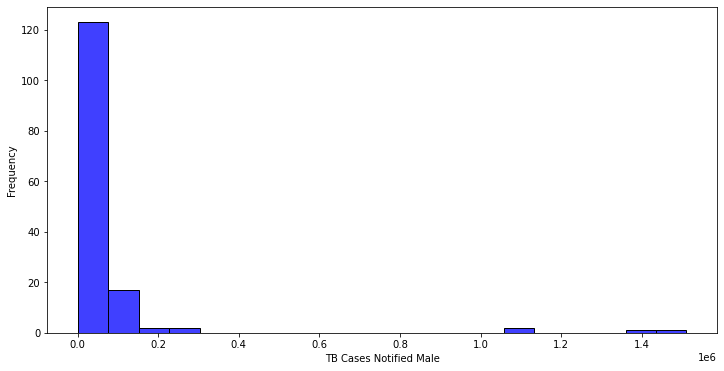

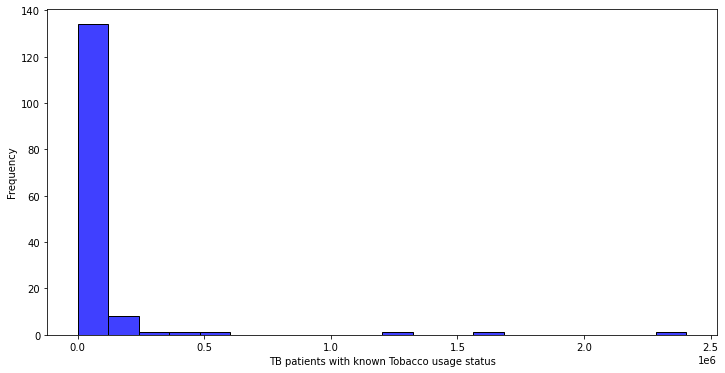

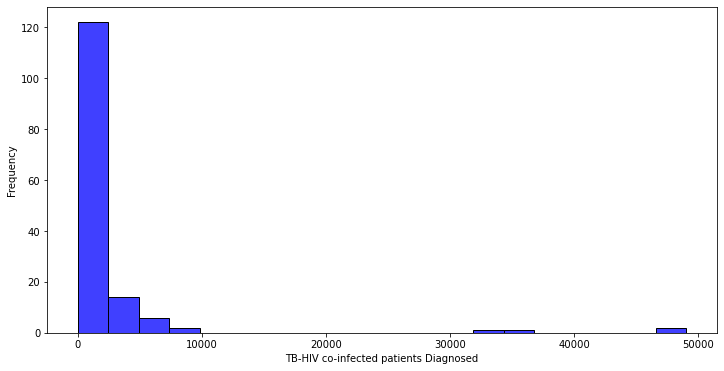

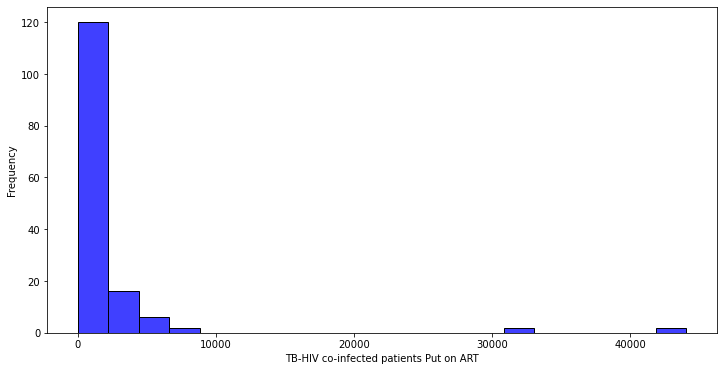

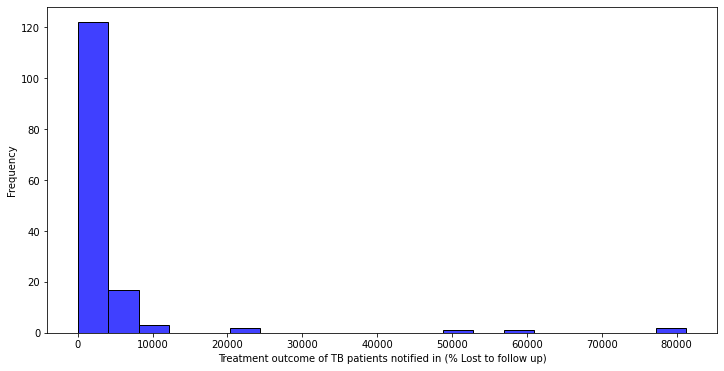

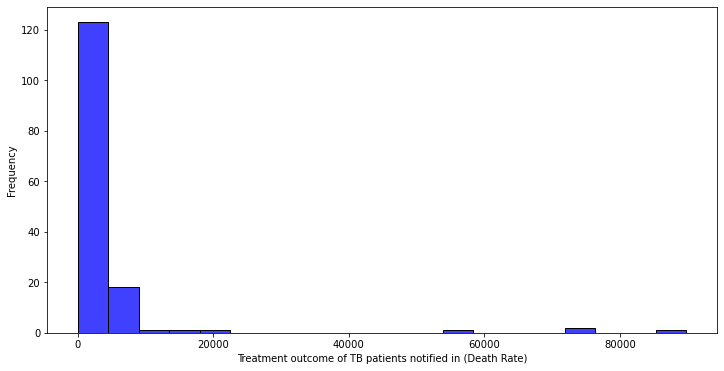

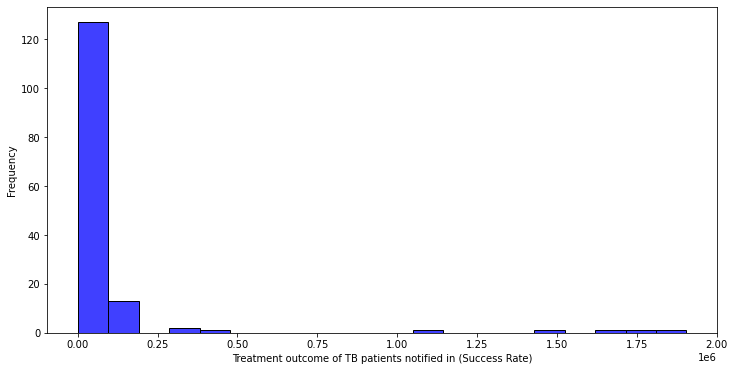

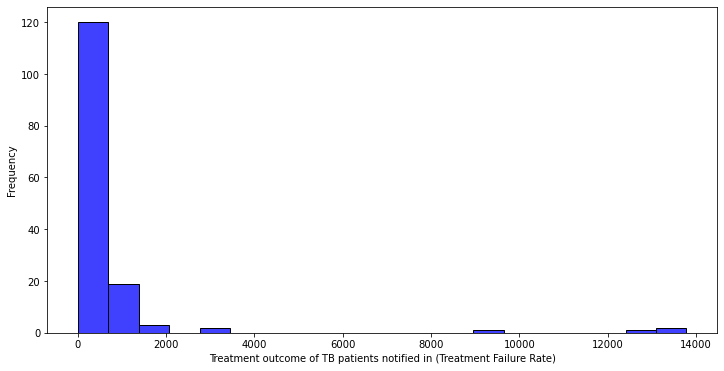

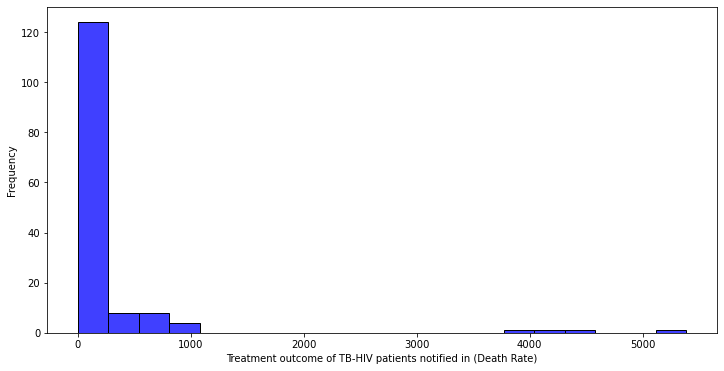

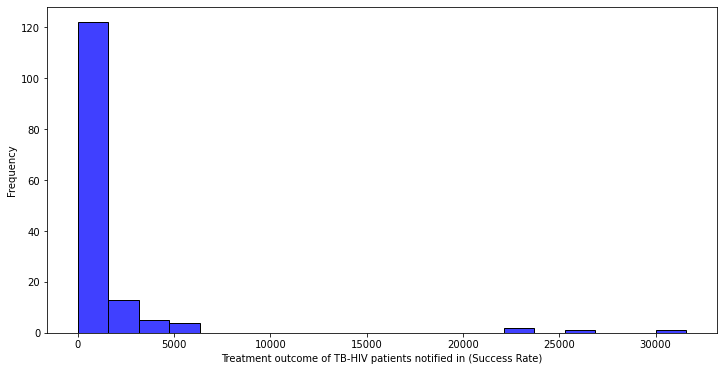

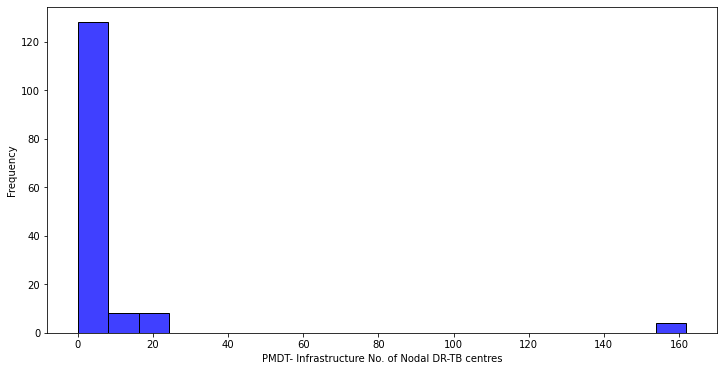

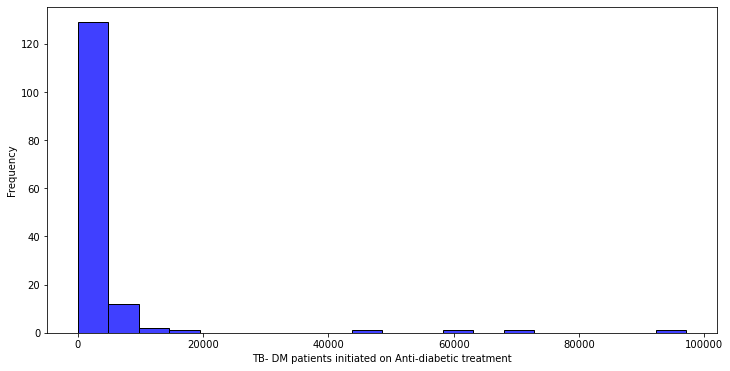

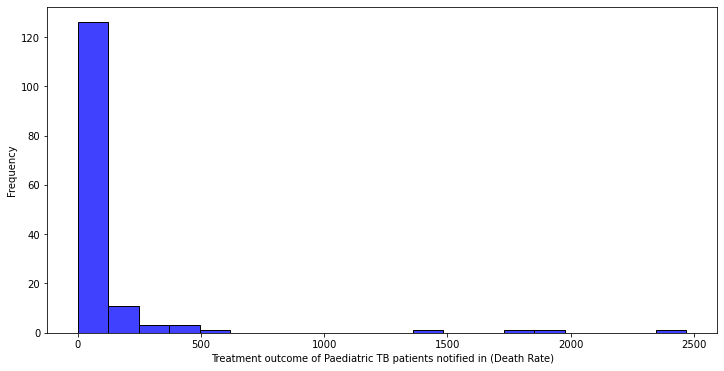

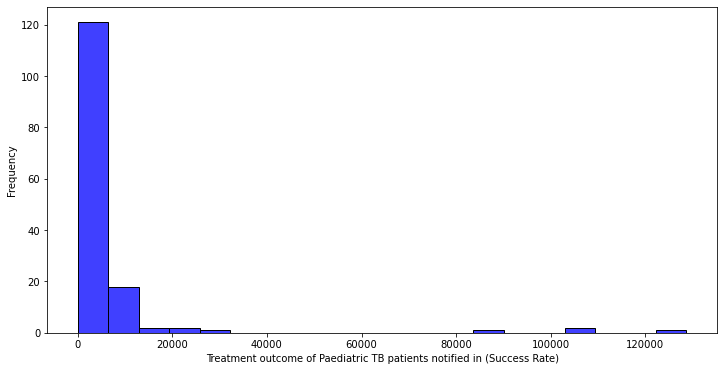

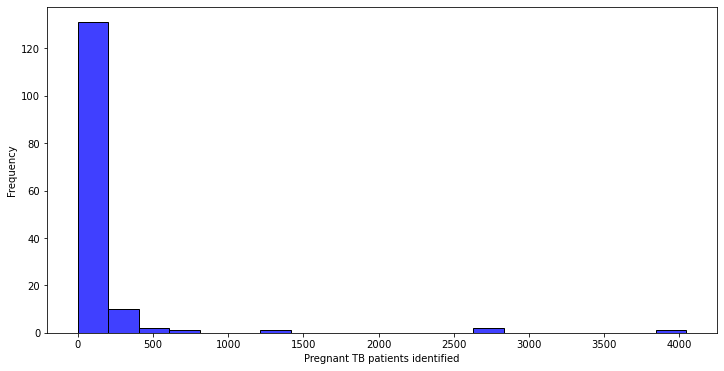

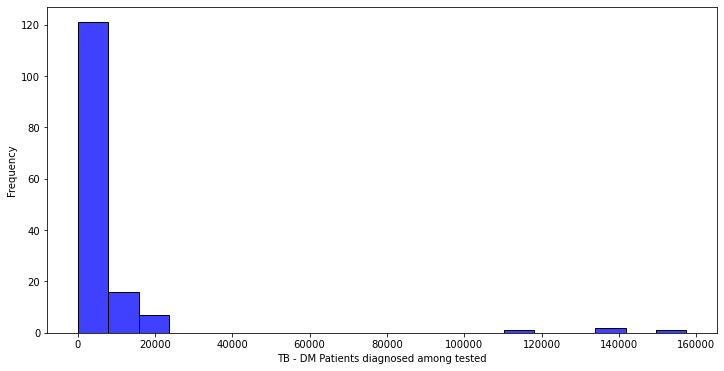

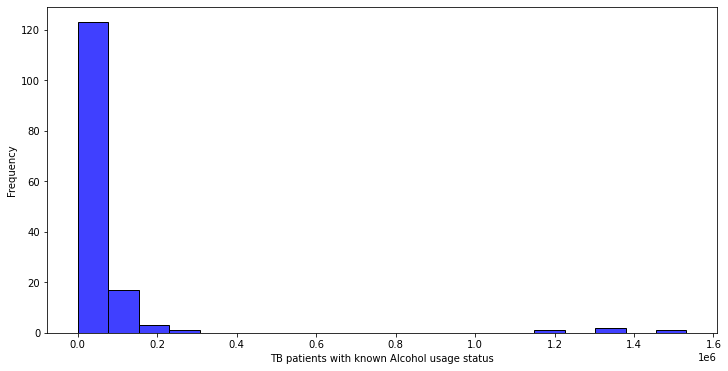

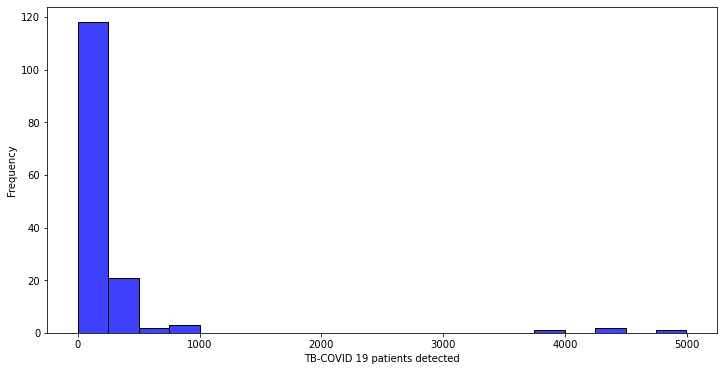

In [16]:
for c in original_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(original_data[c], bins=20, color='blue', edgecolor='black')
    # plt.title('Distribution of ' + c)
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# sns.PairGrid(original_data, diag_sharey=False)

## 2.3 Побудувати парні графіки (scatter plots) між ключовими факторами та цільовою змінною.

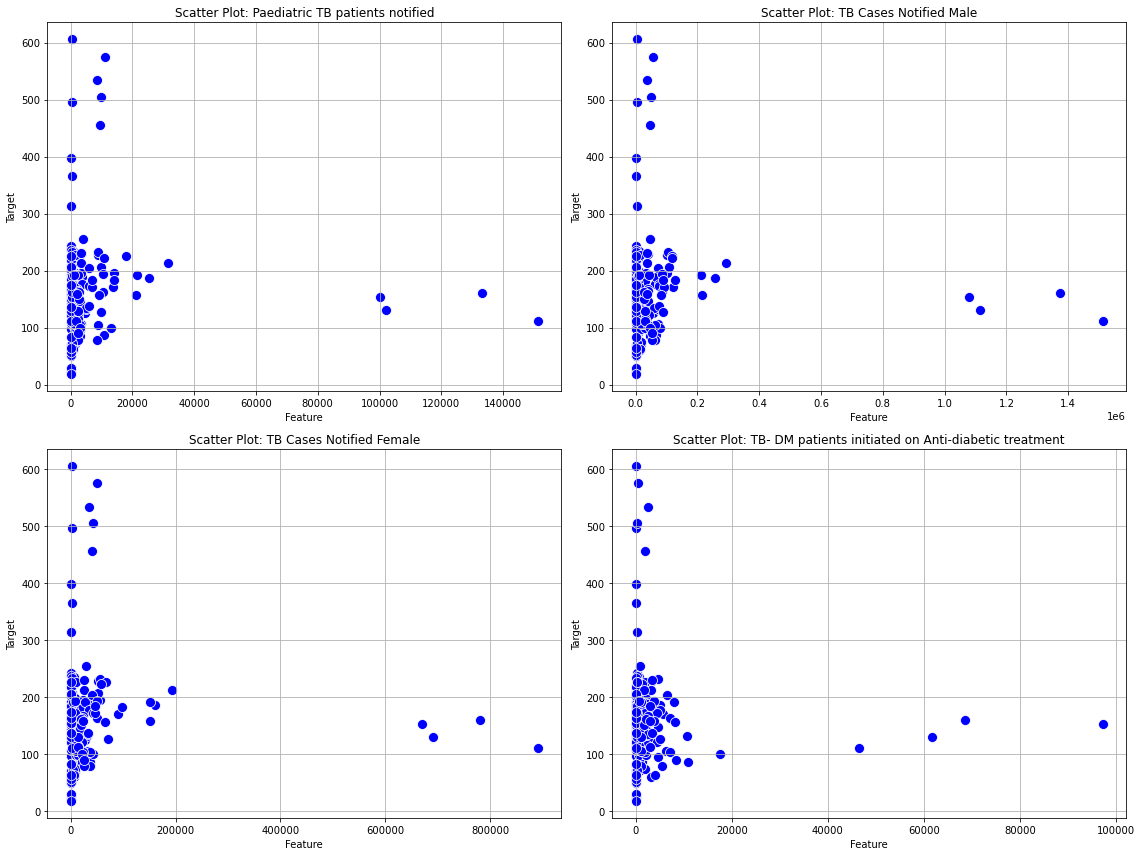

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    'Paediatric TB patients notified',
    'TB Cases Notified Male',
    'TB Cases Notified Female',
    'TB- DM patients initiated on Anti-diabetic treatment',
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(
        x=feature,
        y='TB case notification total',
        data=original_data,
        color='blue',
        s=100,
        ax=axes[i]
    )
    axes[i].set_title(f'Scatter Plot: {feature}')
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 3. Лінійна регресія.

## 3.1 Реалізувати та навчити лінейну регресію.

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [20]:
X = scaled_data.drop(['TB case notification total'], axis=1)
y = scaled_data['TB case notification total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## 3.2 Виконати прогнозування на навчальні та тестовій вибірці та з використанням крос валідації.

### 3.2.1 Навчальна та тестова виборка.

In [22]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

### 3.2.1 Кросс-валідація.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

lr_mse_cv_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = cross_val_score(lr_mse_cv_model, X, y, cv=kf, scoring='neg_mean_squared_error')

lr_r2_cv_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(lr_r2_cv_model, X, y, cv=kf, scoring='r2')

## 3.3 Оцінити точність моделей за метриками RMSE та R².

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

lr_mse_train = mean_squared_error(y_train, y_pred_train)
lr_r2_train = r2_score(y_train, y_pred_train)

lr_mse_test = mean_squared_error(y_test, y_pred_test)
lr_r2_test = r2_score(y_test, y_pred_test)

lr_cv_average_mse = -cv_mse_scores.mean()
lr_cv_average_r2 = cv_r2_scores.mean()

table_data = [
    ["Mean Squared Error (MSE)", lr_mse_train, lr_mse_test, lr_cv_average_mse],
    ["R-squared (R2)", lr_r2_train, lr_r2_test, lr_cv_average_r2],
]

headers = ["Metric", "Train Value", "Test Value", "Cross-Validation Average"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═══════════════╤══════════════╤════════════════════════════╕
│ Metric                   │   Train Value │   Test Value │   Cross-Validation Average │
╞══════════════════════════╪═══════════════╪══════════════╪════════════════════════════╡
│ Mean Squared Error (MSE) │      0.600501 │     0.980171 │                    5.19656 │
├──────────────────────────┼───────────────┼──────────────┼────────────────────────────┤
│ R-squared (R2)           │      0.309704 │     0.300738 │                   -5.36764 │
╘══════════════════════════╧═══════════════╧══════════════╧════════════════════════════╛


# 4. Регуляризація

## 4.1 Використати Lasso та Ridge регресії.

In [25]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
ridge_params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

lasso = Lasso()
ridge = Ridge()

lasso_grid_mse = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_mse.fit(X, y)

ridge_grid_mse = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_mse.fit(X, y)

lasso_grid_r2 = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid_r2.fit(X, y)

ridge_grid_r2 = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid_r2.fit(X, y)

/Users/vyklyuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.042e+00, tolerance: 1.123e-02
  model = cd_fast.enet_coordinate_descent(
/Users/vyklyuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e+00, tolerance: 9.678e-03
  model = cd_fast.enet_coordinate_descent(
/Users/vyklyuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='r2')

In [26]:
lasso_best_alpha_mse = lasso_grid_mse.best_params_['alpha']
lasso_best_score_mse = lasso_grid_mse.best_score_

ridge_best_alpha_mse = ridge_grid_mse.best_params_['alpha']
ridge_best_score_mse = ridge_grid_mse.best_score_

lasso_best_alpha_r2 = lasso_grid_r2.best_params_['alpha']
lasso_best_score_r2 = lasso_grid_r2.best_score_

ridge_best_alpha_r2 = ridge_grid_r2.best_params_['alpha']
ridge_best_score_r2 = ridge_grid_r2.best_score_

reg_result = {
    'Model': ['Lasso', 'Ridge'],
    'Best Alpha (MSE)': [lasso_best_alpha_mse, ridge_best_alpha_mse],
    'Best Score (MSE)': [lasso_best_score_mse, ridge_best_score_mse],
    'Best Alpha (R2)': [lasso_best_alpha_r2, ridge_best_alpha_r2],
    'Best Score (R2)': [lasso_best_score_r2, ridge_best_score_r2]
}

results_table = pd.DataFrame(reg_result)

print(results_table)

   Model  Best Alpha (MSE)  Best Score (MSE)  Best Alpha (R2)  Best Score (R2)
0  Lasso              0.01         -0.815176             0.01         0.100660
1  Ridge              1.00         -0.942882             1.00        -0.050503


# 5. Визначення ключових факторів.

## 5.1 Використати модель отримані лінійні регресії для оцінки ваги кожного фактора для всіх моделей.

## 5.2 Побудувати діаграму важливості факторів на основі ваг коефіцієнтів моделі.

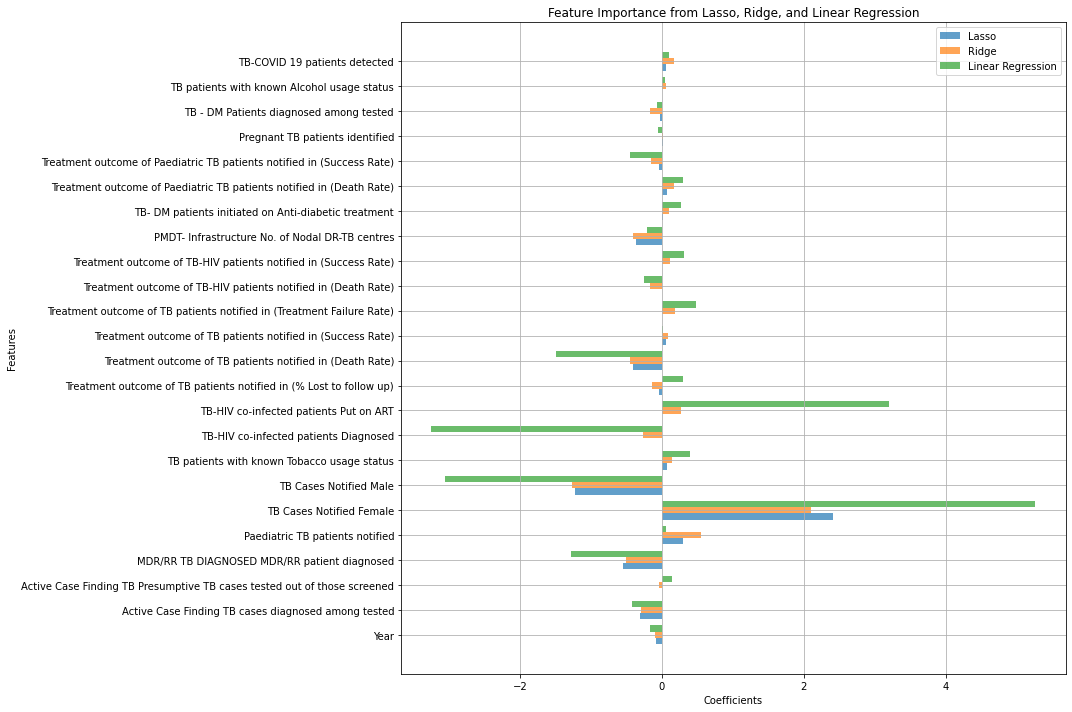

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lasso_coefficients = lasso_grid_mse.best_estimator_.coef_
ridge_coefficients = ridge_grid_mse.best_estimator_.coef_
lr_coefficients = lr_model.coef_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Lasso Coefficient': lasso_coefficients,
    'Ridge Coefficient': ridge_coefficients,
    'Linear Regression Coefficient': lr_coefficients
})

y = np.arange(len(X.columns))
width = 0.25  # Width of each bar

plt.figure(figsize=(15, 10))

plt.barh(y - width, feature_importance['Lasso Coefficient'], width, label='Lasso', alpha=0.7)
plt.barh(y, feature_importance['Ridge Coefficient'], width, label='Ridge', alpha=0.7)
plt.barh(y + width, feature_importance['Linear Regression Coefficient'], width, label='Linear Regression', alpha=0.7)

plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.title('Feature Importance from Lasso, Ridge, and Linear Regression')
plt.yticks(y, feature_importance['Feature'])
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

# 6. Побудова та порівняння моделей.

In [28]:
feature_importance.sort_values(by=['Linear Regression Coefficient'], ascending=False)

,Feature,Lasso Coefficient,Ridge Coefficient,Linear Regression Coefficient
5,TB Cases Notified Female,2.419684,2.107322,5.267556
9,TB-HIV co-infected patients Put on ART,0.000000,0.270044,3.208259
13,Treatment outcome of TB patients notified in (...,0.000000,0.183351,0.480899
7,TB patients with known Tobacco usage status,0.065768,0.140842,0.403452
15,Treatment outcome of TB-HIV patients notified ...,-0.000000,0.108874,0.306359
18,Treatment outcome of Paediatric TB patients no...,0.076777,0.175554,0.296422
10,Treatment outcome of TB patients notified in (...,-0.034294,-0.135819,0.292421
17,TB- DM patients initiated on Anti-diabetic tre...,0.008892,0.098152,0.270214
2,Active Case Finding TB Presumptive TB cases te...,-0.000000,-0.037047,0.143527
23,TB-COVID 19 patients detected,0.057069,0.167566,0.105165


## 6.1 Передбачити щоб код можна було легко доповнювати новими моделями без зміни самої структури коду. Реалізувати такі моделі:

1. Дерево рішень
2. Метод найближчих сусідів
3. Метод опорних векторів (SVM)
4. Випадковий ліс



In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

## 6.2 Виконати прогнозування на навчальні і та тестовій вибірці для кожної моделі, оцінити точність моделей за метриками RMSE та R².

In [31]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        "MSE_train": mse_train,
        "R2_train": r2_train,
        "MSE_test": mse_test,
        "R2_test": r2_test
    }

    print(f"{name}:")
    print(f"  Train - MSE = {mse_train:.4f}, R^2 = {r2_train:.4f}")
    print(f"  Test - MSE = {mse_test:.4f}, R^2 = {r2_test:.4f}")

Decision Tree:
  Train - MSE = 0.0000, R^2 = 1.0000
  Test - MSE = 1.8285, R^2 = -0.3044
KNN:
  Train - MSE = 0.6984, R^2 = 0.1971
  Test - MSE = 1.5141, R^2 = -0.0802
SVM:
  Train - MSE = 0.7383, R^2 = 0.1513
  Test - MSE = 1.3040, R^2 = 0.0697
Random Forest:
  Train - MSE = 0.1184, R^2 = 0.8639
  Test - MSE = 0.7577, R^2 = 0.4595


# 7. Порівняльний аналіз

## 7.1 Побудувати таблицю з результатами (RMSE, R²) для всіх моделей.

In [32]:
results_table = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results_table.append([name, mse_train, r2_train, mse_test, r2_test])

headers = ["Model", "MSE (Train)", "R2 (Train)", "MSE (Test)", "R2 (Test)"]

results_table.append(['Linear regression', lr_mse_train, lr_r2_train, lr_mse_test, lr_r2_test])
results_table.append(['CV. Linear regression', '---', '---', lr_cv_average_mse, lr_cv_average_r2])

results_table.append(['Lasso', '---', '---', lasso_best_score_mse, lasso_best_score_r2])
results_table.append(['Ridge', '---', '---', ridge_best_score_mse, ridge_best_score_r2])

print(tabulate(results_table, headers=headers, tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════════════╤═════════════════════╤══════════════╤═════════════╕
│ Model                 │ MSE (Train)         │ R2 (Train)          │   MSE (Test) │   R2 (Test) │
╞═══════════════════════╪═════════════════════╪═════════════════════╪══════════════╪═════════════╡
│ Decision Tree         │ 0.0                 │ 1.0                 │     1.82846  │  -0.304442  │
├───────────────────────┼─────────────────────┼─────────────────────┼──────────────┼─────────────┤
│ KNN                   │ 0.698420040497965   │ 0.197142057930507   │     1.51414  │  -0.0801966 │
├───────────────────────┼─────────────────────┼─────────────────────┼──────────────┼─────────────┤
│ SVM                   │ 0.7382676505116773  │ 0.15133585490519463 │     1.30398  │   0.0697292 │
├───────────────────────┼─────────────────────┼─────────────────────┼──────────────┼─────────────┤
│ Random Forest         │ 0.11839203980286751 │ 0.8639042640217357  │     0.757688 │   0.45946   │
├─────────

## 7.2 Візуалізувати порівняння точності моделей у вигляді стовпчастого графіка.

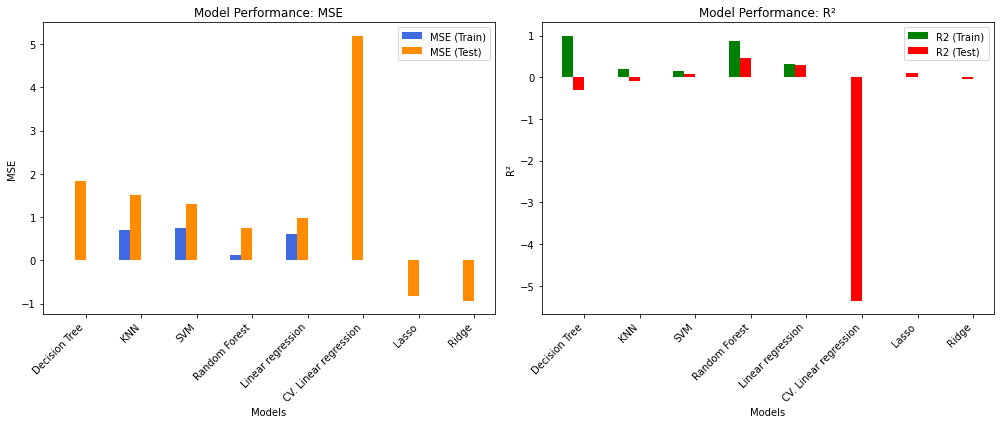

In [33]:
models_ = [row[0] for row in results_table]
mse_train = [row[1] if isinstance(row[1], (int, float)) else 0 for row in results_table]
r2_train = [row[2] if isinstance(row[2], (int, float)) else 0 for row in results_table]
mse_test = [row[3] if isinstance(row[3], (int, float)) else 0 for row in results_table]
r2_test = [row[4] if isinstance(row[4], (int, float)) else 0 for row in results_table]

x = np.arange(len(models_))

bar_width = 0.2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(x - 1.5 * bar_width, mse_train, bar_width, label='MSE (Train)', color='royalblue')
ax1.bar(x - 0.5 * bar_width, mse_test, bar_width, label='MSE (Test)', color='darkorange')

ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_title('Model Performance: MSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models_, rotation=45, ha="right")
ax1.legend()

ax2.bar(x - 1.5 * bar_width, r2_train, bar_width, label='R2 (Train)', color='green')
ax2.bar(x - 0.5 * bar_width, r2_test, bar_width, label='R2 (Test)', color='red')

ax2.set_xlabel('Models')
ax2.set_ylabel('R²')
ax2.set_title('Model Performance: R²')
ax2.set_xticks(x)
ax2.set_xticklabels(models_, rotation=45, ha="right")
ax2.legend()

plt.tight_layout()
plt.show()

## 7.3 Зробити висновки про фактори, які найбільше впливають на прогноз в залежності від моделі.

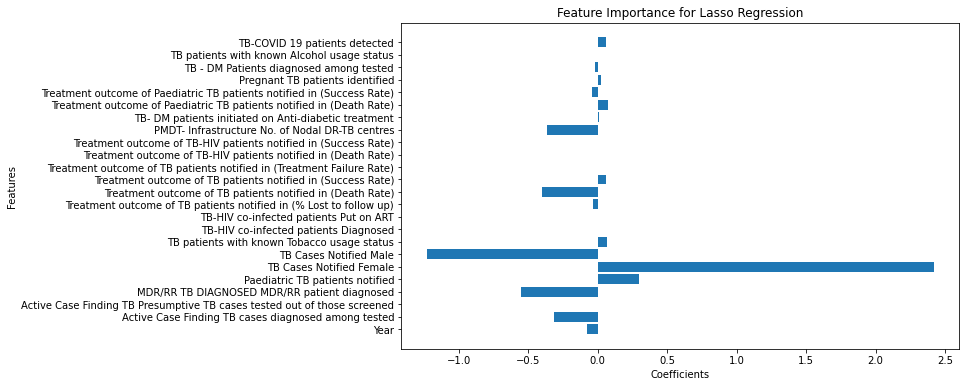

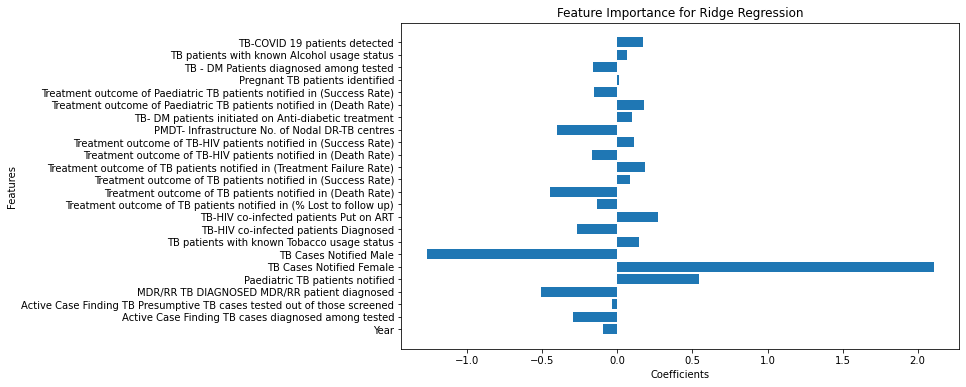

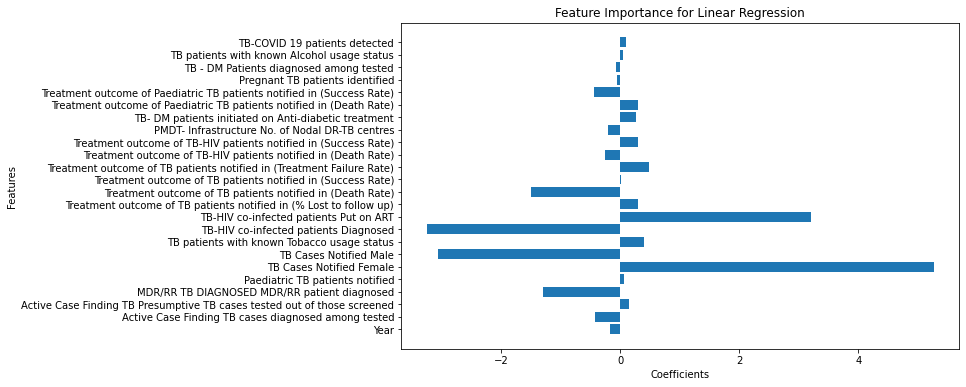

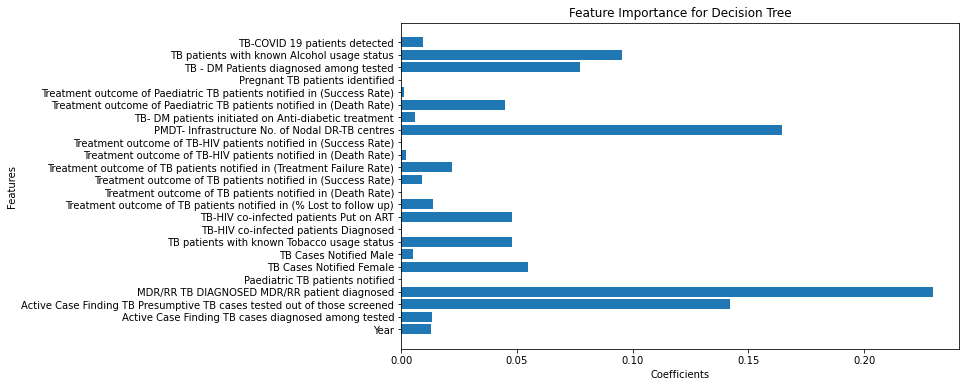

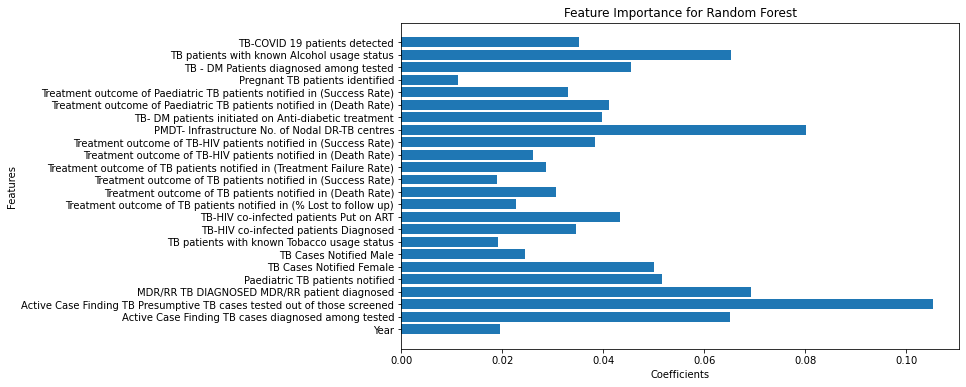

In [34]:
import matplotlib.pyplot as plt

def plot_feature_importance(model_name, coefficients):
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, coefficients)
    plt.xlabel("Coefficients")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {model_name}")
    plt.show()

plot_feature_importance("Lasso Regression", lasso_coefficients)
plot_feature_importance("Ridge Regression", ridge_coefficients)
plot_feature_importance("Linear Regression", lr_coefficients)

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plot_feature_importance(name, model.feature_importances_)

In [35]:
res = pd.DataFrame(X.columns, columns=['Factors'])

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        res[name] = model.feature_importances_
res.index = res.Factors
res.sort_values(by=['Random Forest'], ascending=False)

,Factors,Decision Tree,Random Forest
Factors,,,
Active Case Finding TB Presumptive TB cases tested out of those screened,Active Case Finding TB Presumptive TB cases te...,0.142213,0.105245
PMDT- Infrastructure No. of Nodal DR-TB centres,PMDT- Infrastructure No. of Nodal DR-TB centres,0.164667,0.080200
MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,0.229570,0.069238
TB patients with known Alcohol usage status,TB patients with known Alcohol usage status,0.095303,0.065410
Active Case Finding TB cases diagnosed among tested,Active Case Finding TB cases diagnosed among t...,0.013359,0.065153
Paediatric TB patients notified,Paediatric TB patients notified,0.000015,0.051710
TB Cases Notified Female,TB Cases Notified Female,0.054874,0.050110
TB - DM Patients diagnosed among tested,TB - DM Patients diagnosed among tested,0.077079,0.045450
TB-HIV co-infected patients Put on ART,TB-HIV co-infected patients Put on ART,0.047919,0.043398


# EXTRRA

In [36]:
population_data = {
  "Andaman & Nicobar Islands": {
    "2017": 398000,
    "2018": 400000,
    "2019": 403000,
    "2020": 417036
  },
  "Andhra Pradesh": {
    "2017": 51600000,
    "2018": 52400000,
    "2019": 53156000,
    "2020": 53903393
  },
  "Arunachal Pradesh": {
    "2017": 1530000,
    "2018": 1550000,
    "2019": 1562000,
    "2020": 1570458
  },
  "Assam": {
    "2017": 34500000,
    "2018": 35000000,
    "2019": 35713000,
    "2020": 35607039
  },
  "Bihar": {
    "2017": 120500000,
    "2018": 122500000,
    "2019": 124800000,
    "2020": 125600000
  },
  "Chandigarh": {
    "2017": 1150000,
    "2018": 1180000,
    "2019": 1231000,
    "2020": 1158473
  },
  "Chhattisgarh": {
    "2017": 28900000,
    "2018": 29500000,
    "2019": 30180000,
    "2020": 29436231
  },
  "Dadra & Nagar Haveli and Daman & Diu": {
    "2017": 610000,
    "2018": 615000,
    "2019": 1263000,
    "2020": 615724
  },
  "Delhi": {
    "2017": 20300000,
    "2018": 21000000,
    "2019": 21359000,
    "2020": 20965000
  },
  "Goa": {
    "2017": 1550000,
    "2018": 1560000,
    "2019": 1575000,
    "2020": 1567000
  },
  "Gujarat": {
    "2017": 70200000,
    "2018": 71000000,
    "2019": 71507000,
    "2020": 71507000
  },
  "Haryana": {
    "2017": 29600000,
    "2018": 30000000,
    "2019": 30209000,
    "2020": 30209000
  },
  "Himachal Pradesh": {
    "2017": 7300000,
    "2018": 7400000,
    "2019": 7468000,
    "2020": 7468000
  },
  "Jammu & Kashmir": {
    "2017": 13300000,
    "2018": 13400000,
    "2019": 13603000,
    "2020": 13720000
  },
  "Jharkhand": {
    "2017": 38500000,
    "2018": 39000000,
    "2019": 39466000,
    "2020": 39800000
  },
  "Karnataka": {
    "2017": 66400000,
    "2018": 67000000,
    "2019": 67692000,
    "2020": 68400000
  },
  "Kerala": {
    "2017": 35000000,
    "2018": 35300000,
    "2019": 35776000,
    "2020": 35900000
  },
  "Ladakh": {
    "2017": 270000,
    "2018": 275000,
    "2019": 300000,
    "2020": 305000
  },
  "Lakshadweep": {
    "2017": 64000,
    "2018": 64500,
    "2019": 69000,
    "2020": 70000
  },
  "Madhya Pradesh": {
    "2017": 80400000,
    "2018": 81000000,
    "2019": 82300000,
    "2020": 83500000
  },
  "Maharashtra": {
    "2017": 121000000,
    "2018": 122500000,
    "2019": 123100000,
    "2020": 124500000
  },
  "Manipur": {
    "2017": 3100000,
    "2018": 3150000,
    "2019": 3223000,
    "2020": 3250000
  },
  "Meghalaya": {
    "2017": 3200000,
    "2018": 3300000,
    "2019": 3349000,
    "2020": 3400000
  },
  "Mizoram": {
    "2017": 1200000,
    "2018": 1210000,
    "2019": 1238000,
    "2020": 1250000
  },
  "Nagaland": {
    "2017": 2200000,
    "2018": 2220000,
    "2019": 2233000,
    "2020": 2250000
  },
  "Odisha": {
    "2017": 45600000,
    "2018": 46000000,
    "2019": 46276000,
    "2020": 46700000
  },
  "Puducherry": {
    "2017": 1590000,
    "2018": 1600000,
    "2019": 1646000,
    "2020": 1670000
  },
  "Punjab": {
    "2017": 29900000,
    "2018": 30200000,
    "2019": 30730000,
    "2020": 31000000
  },
  "Rajasthan": {
    "2017": 75900000,
    "2018": 76400000,
    "2019": 77264000,
    "2020": 78000000
  },
  "Sikkim": {
    "2017": 670000,
    "2018": 680000,
    "2019": 689000,
    "2020": 695000
  },
  "Tamil Nadu": {
    "2017": 76500000,
    "2018": 77000000,
    "2019": 77841000,
    "2020": 78500000
  },
  "Telangana": {
    "2017": 37500000,
    "2018": 38000000,
    "2019": 38090000,
    "2020": 38400000
  },
  "Tripura": {
    "2017": 4100000,
    "2018": 4120000,
    "2019": 4147000,
    "2020": 4200000
  },
  "Uttar Pradesh": {
    "2017": 220000000,
    "2018": 222000000,
    "2019": 224979000,
    "2020": 227500000
  },
  "Uttarakhand": {
    "2017": 11100000,
    "2018": 11300000,
    "2019": 11637000,
    "2020": 11720000
  },
  "West Bengal": {
    "2017": 96000000,
    "2018": 97500000,
    "2019": 99609300,
    "2020": 101000000
  },
}
df_population = pd.DataFrame(population_data)
df_population = df_population.transpose()
population = pd.concat([df_population[col] for col in df_population.columns])

In [37]:
data = pd.read_excel('filled_final_data.xlsx')

addition_data = pd.read_excel('addition.xlsx')
addition_data = addition_data.rename(columns={'Unnamed: 0': 'City'})
columns_to_update = ['Treatment outcome of TB patients notified in (Success Rate)',
                     'Treatment outcome of TB patients notified in (Death Rate)',
                     'Treatment outcome of TB patients notified in (Treatment Failure Rate)',
                     'Treatment outcome of TB patients notified in (% Lost to follow up)',
                     'Treatment outcome of TB-HIV patients notified in (Success Rate)',
                     'Treatment outcome of TB-HIV patients notified in (Death Rate)']
data = data.copy()
merged_df = pd.merge(left=data, right=addition_data, how='left', on='City')
data.loc[0:36, columns_to_update[0]] = merged_df.loc[0:36, columns_to_update[0] + '_y']
data.loc[0:36, columns_to_update[1]] = merged_df.loc[0:36, columns_to_update[1] + '_y']
data.loc[0:36, columns_to_update[2]] = merged_df.loc[0:36, columns_to_update[2] + '_y']
data.loc[0:36, columns_to_update[3]] = merged_df.loc[0:36, columns_to_update[3] + '_y']
data.loc[0:36, columns_to_update[4]] = merged_df.loc[0:36, columns_to_update[4] + '_y']
data.loc[0:36, columns_to_update[5]] = merged_df.loc[0:36, columns_to_update[5] + '_y']
original_data = data.copy()
data = data[data['City'] != 'INDIA']

data = data.reset_index()

data = data[scaled_data.columns]

data['population'] = population.reset_index(drop=True)
# data['total_inf'] = data['population'] / 100000 * data['TB case notification total']

In [38]:
data

,Year,Active Case Finding TB cases diagnosed among tested,Active Case Finding TB Presumptive TB cases tested out of those screened,MDR/RR TB DIAGNOSED MDR/RR patient diagnosed,Paediatric TB patients notified,TB case notification total,TB Cases Notified Female,TB Cases Notified Male,TB patients with known Tobacco usage status,TB-HIV co-infected patients Diagnosed,...,Treatment outcome of TB-HIV patients notified in (Success Rate),PMDT- Infrastructure No. of Nodal DR-TB centres,TB- DM patients initiated on Anti-diabetic treatment,Treatment outcome of Paediatric TB patients notified in (Death Rate),Treatment outcome of Paediatric TB patients notified in (Success Rate),Pregnant TB patients identified,TB - DM Patients diagnosed among tested,TB patients with known Alcohol usage status,TB-COVID 19 patients detected,population
0,2019,6,103,60,37,144,214,344,137,2,...,3,1,48,0,23,0,92,425,0,398000
1,2019,1771,35785,1924,3641,176,29046,61977,47090,6924,...,4239,4,4735,26,3090,83,9045,69442,222,51600000
2,2019,27,1535,173,462,216,1545,1871,602,3,...,3,5,48,5,314,0,47,2219,1,1530000
3,2019,547,7114,588,1664,126,14142,28732,8199,278,...,111,6,966,28,1271,29,2081,22463,55,34500000
4,2019,2483,51380,4055,10691,87,37322,67489,6081,1498,...,847,7,1446,171,8279,185,4742,58337,73,120500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022,2665,63700,1152,1932,159,23549,37280,56804,1720,...,1405,3,3010,7,1746,176,3732,56303,140,38400000
140,2022,39,3041,20,44,64,542,1593,2000,40,...,15,1,179,0,33,7,407,1862,9,4200000
141,2022,25080,232920,12339,21323,192,150653,212835,282077,2454,...,1505,22,7939,541,18625,707,20422,265676,302,227500000
142,2022,278,3612,490,947,193,8074,11595,16811,121,...,160,3,665,21,822,44,1407,16221,45,11720000


In [39]:
data['total_inf'] =  100000 * data['TB case notification total'] / data['population']

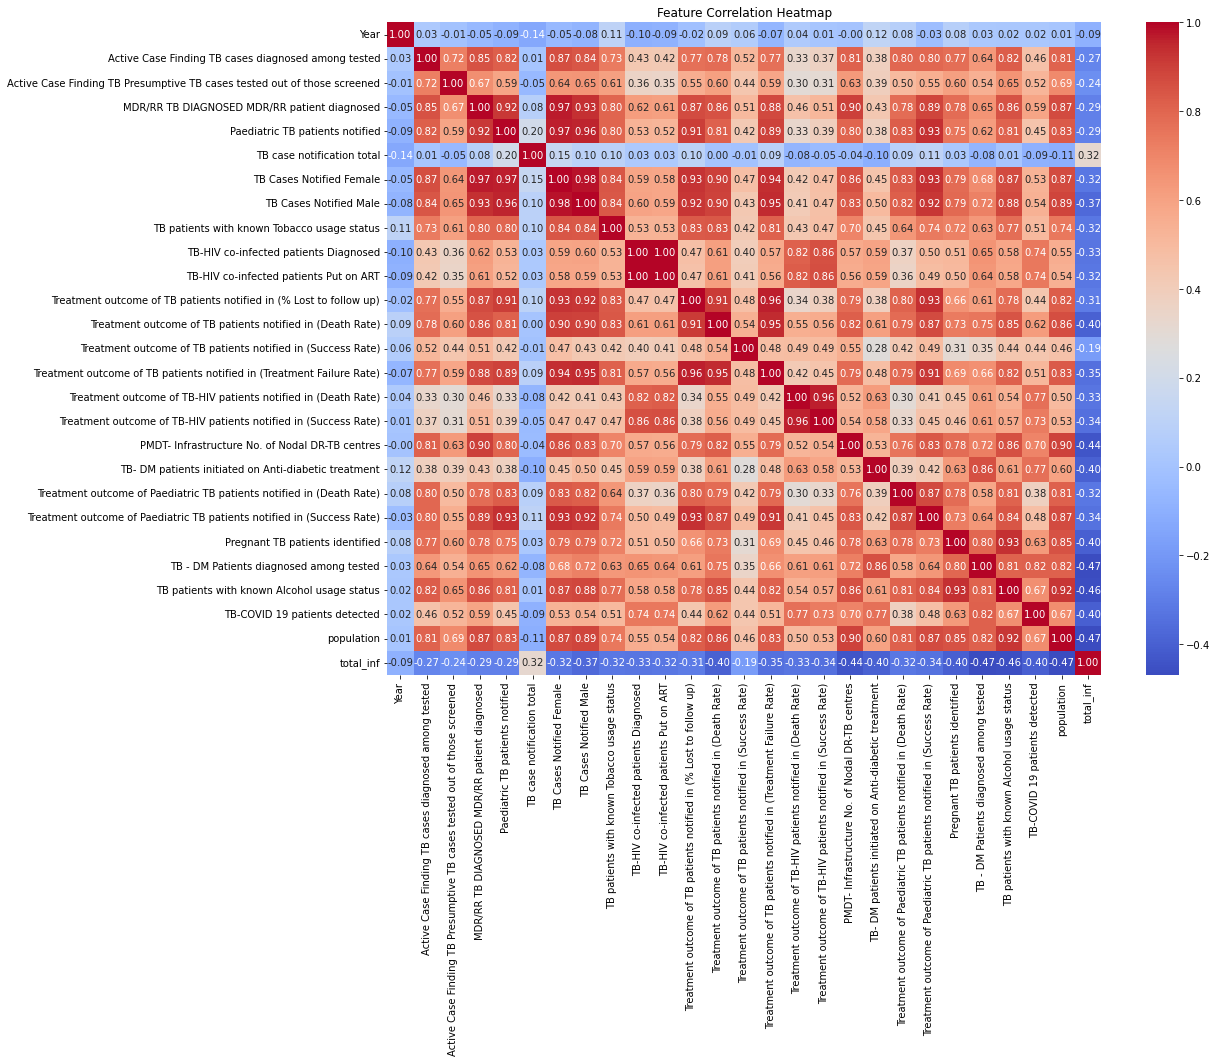

In [40]:
# scaled_data['TB case notification total'] = data['total_inf']


correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Feature Correlation Heatmap')
plt.show()

In [41]:
scaled_data.columns

Index(['Year', 'Active Case Finding TB cases diagnosed among tested',
       'Active Case Finding TB Presumptive TB cases tested out of those screened',
       'MDR/RR TB DIAGNOSED MDR/RR patient diagnosed',
       'Paediatric TB patients notified', 'TB case notification total',
       'TB Cases Notified Female', 'TB Cases Notified Male',
       'TB patients with known Tobacco usage status',
       'TB-HIV co-infected patients Diagnosed',
       'TB-HIV co-infected patients Put on ART',
       'Treatment outcome of TB patients notified in (% Lost to follow up)',
       'Treatment outcome of TB patients notified in (Death Rate)',
       'Treatment outcome of TB patients notified in (Success Rate)',
       'Treatment outcome of TB patients notified in (Treatment Failure Rate)',
       'Treatment outcome of TB-HIV patients notified in (Death Rate)',
       'Treatment outcome of TB-HIV patients notified in (Success Rate)',
       'PMDT- Infrastructure No. of Nodal DR-TB centres',
       'T

In [42]:
# scaled_data

In [43]:
X = data.drop([ 'TB case notification total', 'total_inf', 'population'], axis=1)
y = data['total_inf']

# X = scaled_data.drop(['TB case notification total'], axis=1)
# y = scaled_data['TB case notification total']

scaler = StandardScaler()
scaled_data = X.copy()
scaled_data[X.columns] = scaler.fit_transform(scaled_data[X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

In [44]:
X_train.shape

(115, 24)

In [45]:
# X_train_tb = X_train['TB case notification total']
# X_test_tb = X_test['TB case notification total']

In [46]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [47]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        "MSE_train": mse_train,
        "R2_train": r2_train,
        "MSE_test": mse_test,
        "R2_test": r2_test
    }

    print(f"{name}:")
    print(f"  Train - MSE = {mse_train:.4f}, R^2 = {r2_train:.4f}")
    print(f"  Test - MSE = {mse_test:.4f}, R^2 = {r2_test:.4f}")

Decision Tree:
  Train - MSE = 0.0000, R^2 = 1.0000
  Test - MSE = 24.4366, R^2 = 0.8724
Random Forest:
  Train - MSE = 5.9059, R^2 = 0.9606
  Test - MSE = 31.0507, R^2 = 0.8378


# Plot modified target result

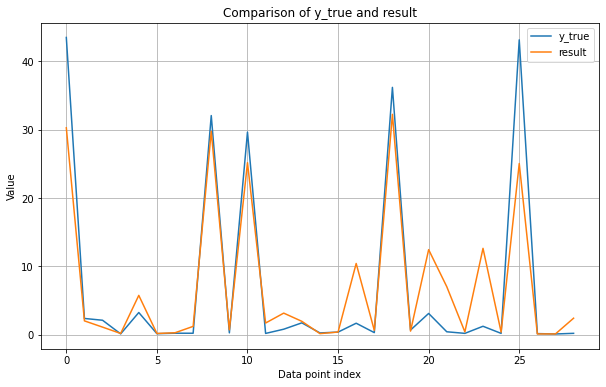

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='y_true')
plt.plot(y_test_pred, label='result')
plt.xlabel('Data point index')
plt.ylabel('Value')
plt.title('Comparison of y_true and result')
plt.legend()
plt.grid(True)
plt.show()

# Plot original target

In [63]:
# result = y_test_pred / X_test['population'] * 100000

In [64]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# # plt.plot(X_test_tb.values, label='y_test')
# plt.plot(result.values, label='result')
# plt.xlabel('Data point index')
# plt.ylabel('Value')
# plt.title('Comparison of y_test, result, and X_test_tb')
# plt.legend()
# plt.grid(True)
# plt.show()

In [65]:
# r2 = r2_score(X_test_tb, result)
# print(f"R-squared (R2) for X_test_tb and result: {r2}")

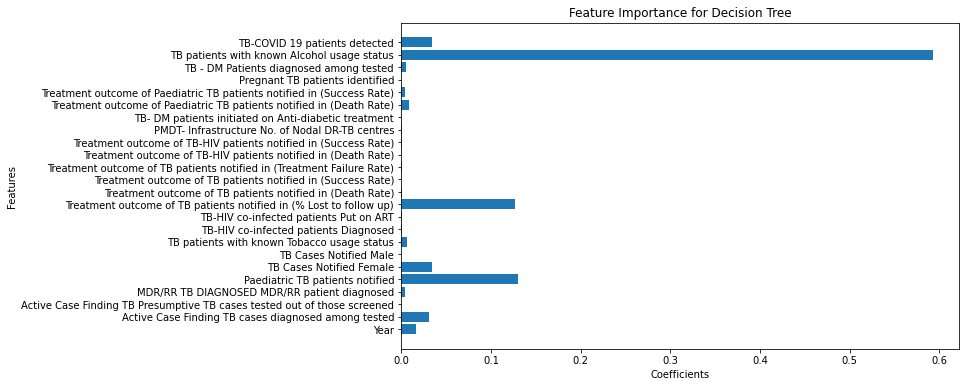

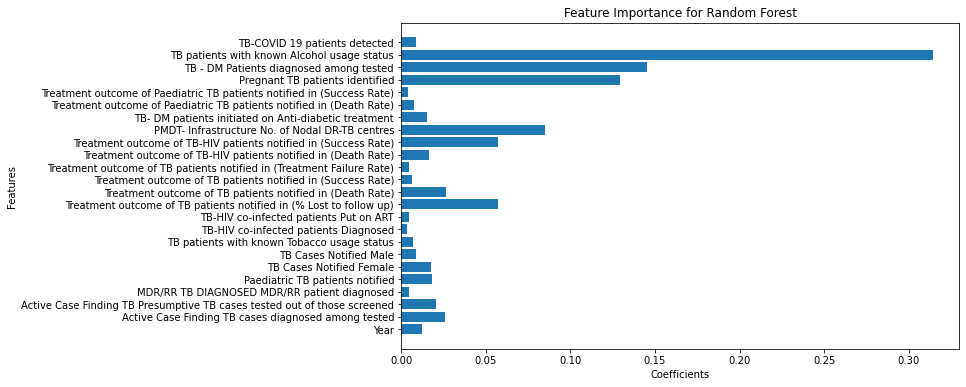

In [66]:
import matplotlib.pyplot as plt

def plot_feature_importance(model_name, coefficients):
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, coefficients)
    plt.xlabel("Coefficients")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {model_name}")
    plt.show()

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plot_feature_importance(name, model.feature_importances_)

In [67]:
res = pd.DataFrame(X.columns, columns=['Factors'])

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        res[name] = model.feature_importances_
res.index = res.Factors
res.sort_values(by=['Random Forest'], ascending=False)

,Factors,Decision Tree,Random Forest
Factors,,,
TB patients with known Alcohol usage status,TB patients with known Alcohol usage status,0.592538,0.314073
TB - DM Patients diagnosed among tested,TB - DM Patients diagnosed among tested,0.005823,0.145102
Pregnant TB patients identified,Pregnant TB patients identified,0.000000,0.129540
PMDT- Infrastructure No. of Nodal DR-TB centres,PMDT- Infrastructure No. of Nodal DR-TB centres,0.000584,0.084888
Treatment outcome of TB patients notified in (% Lost to follow up),Treatment outcome of TB patients notified in (...,0.126449,0.057262
Treatment outcome of TB-HIV patients notified in (Success Rate),Treatment outcome of TB-HIV patients notified ...,0.001392,0.057153
Treatment outcome of TB patients notified in (Death Rate),Treatment outcome of TB patients notified in (...,0.001178,0.026272
Active Case Finding TB cases diagnosed among tested,Active Case Finding TB cases diagnosed among t...,0.030623,0.025630
Active Case Finding TB Presumptive TB cases tested out of those screened,Active Case Finding TB Presumptive TB cases te...,0.000009,0.020635
